In [25]:
import hickle as hkl 
import pyproj
from skimage import measure
import sys
import calendar
import os
from pathlib import Path
from functools import partial
from rtree import index
import shapely.ops as ops
import shapely.geometry as shp
# import shapely.speedups as speedup
# speedup.disable()
from scipy import stats
import matplotlib.pyplot as plt
import operator
import hickle as hkl
from scipy.stats import chisquare
from scipy.optimize import curve_fit
from scipy import optimize
import netCDF4 as nc
import glob
import numpy as np
import time as ti
import matplotlib.pylab as py
import numpy.ma as ma
import warnings
from matplotlib.collections import PolyCollection

warnings.filterwarnings('ignore')

sys.path.append('/data/pragallva/2023_repeat_ERA5/modules/')
import logruns as logruns
import save_and_load_hdf5_files as h5saveload
import netcdf_utilities as ncutil
import os
os.environ["HDF5_USE_FILE_LOCKING"] = 'FALSE'
from tqdm import tqdm
import glob
from PIL import Image
import copy
import itertools
from datetime import date

!ls /data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable//DJF_Ac=65/

1980	  1986.hkl  1993      1999.hkl	2006	  2012.hkl  2019
1980.hkl  1987	    1993.hkl  2000	2006.hkl  2013	    2019.hkl
1981	  1987.hkl  1994      2000.hkl	2007	  2013.hkl  2020
1981.hkl  1988	    1994.hkl  2001	2007.hkl  2014	    2020.hkl
1982	  1988.hkl  1995      2001.hkl	2008	  2014.hkl  2021
1982.hkl  1989	    1995.hkl  2002	2008.hkl  2015	    2021.hkl
1983	  1989.hkl  1996      2002.hkl	2009	  2015.hkl  banded_data
1983.hkl  1990	    1996.hkl  2003	2009.hkl  2016	    input_file
1984	  1990.hkl  1997      2003.hkl	2010	  2016.hkl
1984.hkl  1991	    1997.hkl  2004	2010.hkl  2017
1985	  1991.hkl  1998      2004.hkl	2011	  2017.hkl
1985.hkl  1992	    1998.hkl  2005	2011.hkl  2018
1986	  1992.hkl  1999      2005.hkl	2012	  2018.hkl


In [26]:
ls /data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/1980/1979-Dec-12.hkl

/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/1980/1979-Dec-12.hkl


In [75]:
val_2007 = hkl.load('/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/2007.hkl')
list(val_2007.keys())

['start_block_date=2006-Dec-13',
 'start_block_date=2006-Dec-18',
 'start_block_date=2006-Dec-2',
 'start_block_date=2006-Dec-31',
 'start_block_date=2006-Nov-27',
 'start_block_date=2006-Nov-30',
 'start_block_date=2007-Feb-1',
 'start_block_date=2007-Feb-16',
 'start_block_date=2007-Feb-2',
 'start_block_date=2007-Feb-23',
 'start_block_date=2007-Feb-4',
 'start_block_date=2007-Feb-5',
 'start_block_date=2007-Feb-9',
 'start_block_date=2007-Jan-10',
 'start_block_date=2007-Jan-22',
 'start_block_date=2007-Jan-29',
 'start_block_date=2007-Jan-6']

In [76]:
list(zip(*val_2007['start_block_date=2007-Feb-4']['centroids'][1]))

[(-77.99741501087115, 56.82145891667244),
 (-60.654473300138584, 57.0408714269327),
 (-58.40068248489755, 57.97491483175851),
 (-60.70613960122856, 57.55981303346655),
 (-57.22934353170025, 56.70752884695941),
 (-52.311028456127616, 56.54721425271337),
 (-52.93134707763719, 57.64281119848461)]

In [82]:
(val_2007['start_block_date=2007-Feb-4']['centroids'])

[([189.6206072224296, 191.90176880704965, 190.39519055451862],
  [53.95779384924739, 53.96862208767523, 54.58446897184252]),
 ([-77.99741501087115,
   -60.654473300138584,
   -58.40068248489755,
   -60.70613960122856,
   -57.22934353170025,
   -52.311028456127616,
   -52.93134707763719],
  [56.82145891667244,
   57.0408714269327,
   57.97491483175851,
   57.55981303346655,
   56.70752884695941,
   56.54721425271337,
   57.64281119848461])]

In [29]:
event_1 = hkl.load('/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/1980/1979-Dec-12.hkl')

In [30]:
test = hkl.load('/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/banded_data/lonp60-p120/lat45-60/blocking_details_day_wise.hkl')
test['days7']['block2'].keys()

dict_keys(['block_days', 'date', 'location'])

In [31]:
test['days9']

{'block1': {'block_days': 9,
  'date': "b'1984-Feb-8'",
  'location': (63.368219816613916, 56.99131092815938)}}

In [37]:
val_2012 = hkl.load('/data/pragallva/2023_repeat_ERA5/post_processing/blocking_info_extra_variable/DJF_Ac=65/2012.hkl')
list(val_2012.keys())

['start_block_date=2011-Dec-1',
 'start_block_date=2011-Dec-11',
 'start_block_date=2011-Dec-14',
 'start_block_date=2011-Dec-15',
 'start_block_date=2011-Dec-18',
 'start_block_date=2011-Dec-23',
 'start_block_date=2011-Dec-26',
 'start_block_date=2011-Dec-27',
 'start_block_date=2011-Dec-5',
 'start_block_date=2011-Nov-22',
 'start_block_date=2011-Nov-26',
 'start_block_date=2012-Feb-10',
 'start_block_date=2012-Feb-13',
 'start_block_date=2012-Feb-19',
 'start_block_date=2012-Feb-2',
 'start_block_date=2012-Feb-27',
 'start_block_date=2012-Feb-5',
 'start_block_date=2012-Jan-13',
 'start_block_date=2012-Jan-18',
 'start_block_date=2012-Jan-19',
 'start_block_date=2012-Jan-23',
 'start_block_date=2012-Jan-25',
 'start_block_date=2012-Jan-28',
 'start_block_date=2012-Jan-31']

In [49]:
event_1['contours'][0]

## Try plotting all the tracks in 2d

7


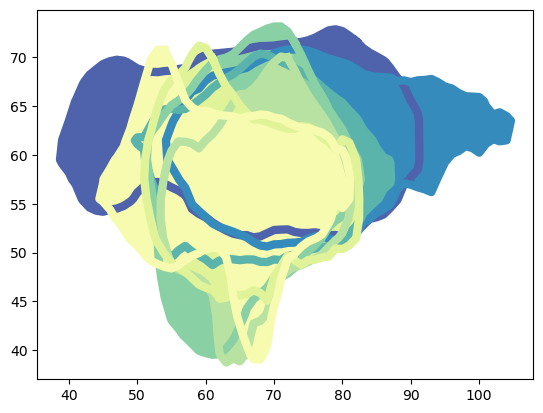

In [51]:
cmap2=py.get_cmap("Spectral_r")
event_1 = val_2007['start_block_date=2012-Jan-31']
MAX = len(event_1['contours'][0])
for i in range(MAX):
    p = shp.Polygon(event_1['contours'][0][i])
    py.plot(((*p.exterior.coords.xy)), lw=6, c=cmap2(((i+0.5)/2)/MAX))
    py.fill(((*p.exterior.coords.xy)), alpha=1, facecolor=cmap2(((i+0.5)/2)/MAX), edgecolor=None)
# py.plot(event_1['centroids'][1][0], event_1['centroids'][1][1], color='k')
# py.scatter(event_1['centroids'][1][0], event_1['centroids'][1][1], c=[cmap2(i) for i in range(MAX)], s=500)

print (MAX)

## Plotting all the tracks in 3d

In [65]:
def plot_3d_schematic(event_1, elev=10., azim=-50, figsize=(15,8), cmap2=py.get_cmap("Spectral_r")):
    
        def polygon_under_graph(p):
            """
            Construct the vertex list which defines the polygon filling the space under
            the (x, y) line graph. This assumes x is in ascending order.
            """
            return list(zip(*p.exterior.coords.xy))

        def extract_c(i, MAX):
            return cmap2(((i+2)/1.2)/MAX)

        fig = py.figure(figsize=figsize, constrained_layout=True)
        ax = fig.add_subplot(projection='3d')

        verts = []
        
        MAXi = np.linspace(-int(len(event_1['contours'][0])/2), int(len(event_1['contours'][0])/2), len(event_1['contours'][0])) #len(event_1['contours'][1])
           
        MAX = len(MAXi)
        for i in range(MAX):
            p = shp.Polygon(event_1['contours'][0][i])
            ax.plot(((*p.exterior.coords.xy)), zs=MAXi[i], zdir='x', c=extract_c(i, MAX), lw=5)
            verts.append(polygon_under_graph(p))


        ydata = event_1['centroids'][0][0]
        zdata = event_1['centroids'][0][1]
        xdata = MAXi
        
        xc, yc = event_1['envelope_centroid'][0][0]

        facecolors=[extract_c(i, MAX) for i in range(MAX)]
        poly = PolyCollection(verts, facecolors=facecolors, alpha=0.3)
        ax.add_collection3d(poly, zs=xdata, zdir='x')

#         ax.scatter(xdata, ydata, zdata,  c=[extract_c(i, MAX) for i in range(MAX)], s=100)
        ax.scatter(xdata, ydata, zdata,  c='dodgerblue', s=100)
        ax.plot(xdata, ydata, zdata, c='gray' )
        
#         ax.scatter(0, xc, yc,  c='blue', s=300)
#         ax.scatter(0, xc, yc,  c='w', s=50)


        lon_val = np.linspace(50, 110, 5)
        lon_labels = [('%d W'%(np.abs(i))) if i<0 else ('%d E'%(i)) for i in lon_val]
        ax.set_yticks(lon_val)
        ax.set_yticklabels(lon_labels)

        ax.view_init(elev=elev, azim=azim)
#         ax.axis('off')
        ax.tick_params(labelsize=25, which='major', pad=10)
#         ax.grid(False)
    
        fc = 'white'
        ax.xaxis.pane.set_facecolor(fc)
        ax.yaxis.pane.set_facecolor(fc)
        ax.zaxis.pane.set_facecolor(fc)

        ax.set_xlabel('Time (Days)', labelpad=40, fontsize=25,)
        ax.set_ylabel('Longitude', labelpad=50, fontsize=25)
        ax.set_zlabel('Latitude', labelpad=20, fontsize=25)
        
#         ax.xaxis.label.set_rotation(0)
        

        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['top'].set_visible(False)

        return fig, ax, xc, yc
#         fig.tight_layout()

Text(0.5, 0.8096, 'Feb 3, 2012 near 68E, 58N')

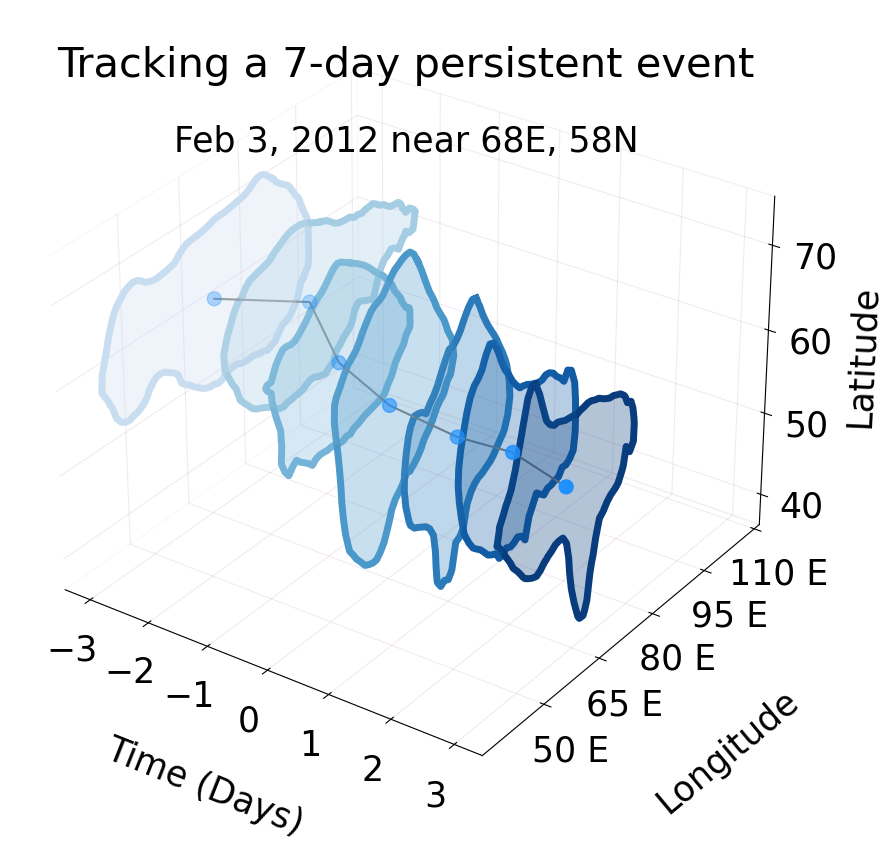

In [74]:
py.rcParams['grid.color'] = (0.5, 0.2, 0.5, 0.1)
fig, ax, xc, yc = plot_3d_schematic(event_1 = val_2012['start_block_date=2012-Jan-31'], elev=30., azim=-55, figsize=(15,8), cmap2=py.get_cmap("Blues"))
fig.suptitle('Tracking a 7-day persistent event', fontsize=30, y=0.95)
ax.set_title('Feb 3, 2012 near %dE, %dN'%(xc, yc), fontsize=25, y=0.88)

# dest = '/data/pragallva/2023_repeat_ERA5/2023_paper_figures/'
# os.makedirs(dest, exist_ok=True)
# fig.savefig(dest+'track_block_schematic.png', dpi=300, bbox_inches='tight')
# fig.savefig(dest+'track_block_schematic.pdf', bbox_inches='tight')
